In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [5]:
#Load the data set
bank= pd.read_csv("C:\\Users\\nilka\\OneDrive\\Desktop\\excelr\\self paced course\\data science assignment\\1.assignments\\6.logistic regression\\bank-full.csv" ,sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='job'>

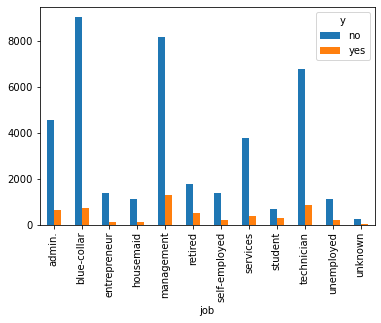

In [8]:
pd.crosstab(bank.job,bank.y).plot(kind='bar')

In [16]:
# assigning 1 to yes and 0 to no
bank ['default'] = bank ['default'].map({'yes': 1, 'no': 0})
bank['housing'] = bank ['housing'].map({'yes': 1, 'no': 0})
bank ['loan'] = bank ['loan'].map({'yes': 1, 'no': 0})
bank ['y'] = bank ['y'].map({'yes': 1, 'no': 0})

In [17]:
# converting categorical variables to dummy variables
bank = pd.get_dummies(bank, columns=['job'])
bank = pd.get_dummies(bank, columns=['marital'])
bank = pd.get_dummies(bank, columns=['education'])
bank = pd.get_dummies(bank, columns=['month'])

In [20]:
bank= bank.drop(['contact', 'poutcome'], axis=1)

In [21]:
# Dividing our data into input and output variables 
X = bank.iloc[:,0:16]
Y = bank.iloc[:,-1]

In [22]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\nilka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [24]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [25]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,0,0


In [26]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[44622    10]
 [  578     1]]


In [27]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44632
           1       0.09      0.00      0.00       579

    accuracy                           0.99     45211
   macro avg       0.54      0.50      0.50     45211
weighted avg       0.98      0.99      0.98     45211



The model has very high recall and precision values and f score is also high. so we donot need any finetuning of model

In [28]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

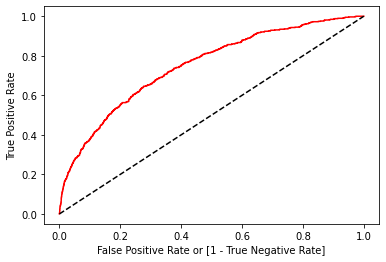

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [30]:
roc_auc_score(Y,y_pred)

0.5007515306133505